In [1]:
# https://juliapackages.com/p/arfima
import Pkg; Pkg.add("ARFIMA")
using ARFIMA

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [=======

Fetching: [========================================>]  99.9 %>                           ]  32.2 %Fetching: [===================>                     ]  47.4 % %            ]  69.0 %   ]  90.6 %Fetching: [=======================================> ]  95.4 %Fetching: [=======================================> ]  95.8 %Fetching: [=======================================> ]  96.3 %Fetching: [=======================================> ]  97.2 %

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
using CSV, Plots, Random, LinearAlgebra, Statistics, DataFrames


In [3]:
headlines = CSV.read("sentiment.csv")
#headlines.rename!(headlines, ["Day", "Score"])
rename!(headlines, ["sentiment"])

,sentiment
,Float64
1,0.0858615
2,-0.0980214
3,-0.0931667
4,0.00919
5,0.0
6,-0.1998
7,-0.190725
8,-0.0343133
9,-0.144262


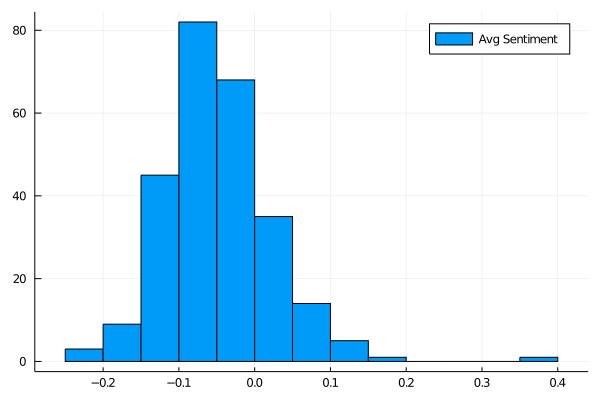

In [4]:
histogram(headlines.sentiment, label = "Avg Sentiment")

In [5]:
delta = CSV.read("delt.csv")
D = delta[1]

263-element Array{Float64,1}:
 58.257412
 59.061855
 58.72419
 58.495766
 58.495766
 58.495766
 58.495766
 58.317001
 58.509997999999996
 58.380001
 57.869999
 57.869999
 57.869999
  ⋮
 31.5
 31.98
 31.5
 33.720001
 34.0
 34.0
 34.0
 31.93
 30.709999
 29.65
 30.76
 30.639999

In [16]:
n = 263
train = convert(Int,floor(263*.8))
htrain = headlines[1:train,:sentiment]
htest = headlines[(train+1):end,:sentiment]
Dtrain = D[1:train]
Dtest = D[(train+1):end];

In [17]:
# AR1 Modeld
X = [htrain[2:end] Dtrain[1:end-1] ones(train-1)]
Xtest = [htest[2:end] Dtest[1:end-1] ones(n-train-1)]
y = Dtrain[2:end]
w = X\y
train_pred = X*w;
test_pred = Xtest*w;
function MSE(y, pred)
    return mean((y-pred).^2)
end
train_MSE = MSE(y,train_pred)
test_MSE = MSE(Dtest[1:end-1],test_pred);

In [18]:
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)
print(w)

Train MSE	2.359090176771469
Test MSE 	0.06233073558317027
[-1.6855430365480455, 0.9669177024594019, 0.7877831253987099]

In [19]:
function aerr(y,pred)
    return mean(abs.(y-pred))
end


aerr (generic function with 1 method)

In [21]:
# AR2 Model
X1 = [htrain[3:end] Dtrain[2:end-1] Dtrain[1:end-2] ones(train-2)]
X1test = [htest[3:end] Dtest[2:end-1] Dtest[1:end-2] ones(length(Dtest[1:end-2]))]
y1 = Dtrain[3:end]
w1 = X1\y1
train_pred1 = X1*w1;
test_pred1 = X1test*w1;
function MSE(y, pred)
    return mean((y-pred).^2)
end
train_MSE1 = MSE(y1,train_pred1)
test_MSE1 = MSE(Dtest[3:end],test_pred1);

In [22]:
train_abs = aerr(y,train_pred)
test_abs = aerr(Dtest[2:end],test_pred);
println("Train Abs Er\t", train_abs)
println("Test Abs ERr \t", test_abs)

Train Abs Er	0.94393456733373
Test Abs ERr 	0.6337946306712656


In [24]:
# Naive Model
X = [htrain ones(length(htrain))]
Xtest = [htest ones(length(htest))]
y = Dtrain[1:end]
w = X\y
train_pred = X*w;
test_pred2 = Xtest*w;
function MSE(y, pred)
    return mean((y-pred).^2)
end
train_MSE = MSE(y,train_pred)
test_MSE = MSE(Dtest,test_pred2);

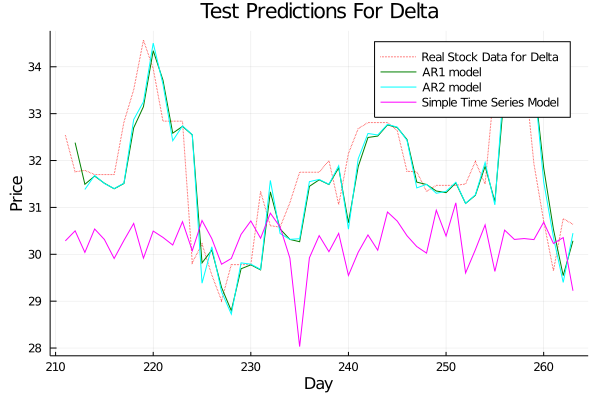

In [25]:
plot(days[train+1:end], Dtest, color=:red,linestyle=:dot, label="Real Stock Data for Delta", title = "Test Predictions For Delta")
#plot!(days[1:train-1], train_pred, color = :blue, label = "Train")
plot!(days[train+2:end], test_pred, color = :green, label = "AR1 model")
plot!(days[train+3:end], test_pred1, color = :cyan, label = "AR2 model")
plot!(days[train+1:end], test_pred2, color = :magenta, label = "Simple Time Series Model")
xlabel!("Day")
ylabel!("Price")